In [585]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier


In [586]:
cd '/content/drive/MyDrive/data_mining/'

/content/drive/MyDrive/data_mining


The code line uses the mounted drive data folder to read the data, if you dont want to mount just simply paste the data on google collab and copy the file pathcode onto the below line for train data.
And below that copy the file path for the test data to read from it.

In [587]:
train_data = pd.read_csv('dataset/train.csv')
train_data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we can see from the trsin data set the columns **Pclass** will show whether the passenger is rich or poor.
Secondly, Using **Age** column we can see that passengers who survived are young/middle/old.
Lastly **Sex** column will show that whether the passenger survived is male or female.

Using the train data set we can refer and predict whether the passenger will survive or not on the test data.

In [588]:
test_data = pd.read_csv('dataset/test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Below we will preprocess and understand the training data.

In [589]:
train_data.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [590]:
a = train_data.isnull().sum()
print(a)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [591]:
train_data.shape

(891, 12)

The output shows what is the shape of the data. And as you can see there are **891** passengers in the train data.


In [592]:
train_data.dropna(subset = ["Age"], inplace=True)

The implementation will drop all the Nan values of Age as if we try and fill the Nan values with mean or mode the result can be deviated from original.

In [593]:
train_data.shape

(714, 12)

From above we can see the shape has now changed and the number of rows are now 714.

In [594]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

Now it shows that there are no **Nan** values in the train data.

In [595]:
survive_by_age = train_data[train_data['Survived'] == 1]
total_rows = survive_by_age['Survived'].count()
print(total_rows)

290


The data shows out that there are 290 rows out of 714 where the passenger survived.





In [596]:
for index in train_data.index:
  
  if (train_data.loc[index,'Age'] > 0.0) and (train_data.loc[index,'Age'] <= 13.0):
    train_data.loc[index,'Age'] = 1
  elif (train_data.loc[index,'Age'] > 13.0) and (train_data.loc[index,'Age'] <= 40):
    train_data.loc[index,'Age'] = 2
  elif (train_data.loc[index,'Age'] > 40) and (train_data.loc[index,'Age'] <= 100.0):
    train_data.loc[index,'Age'] = 3
    
  

I will the change the values of the column **Age** as it needs classification to determine which group of people survived the most. 
I will classify in 1 , 2 , 3 where 1 being **Young**, 2 is **Middle** and 3 is **Old**.

In [597]:
x = sum(train_data['Age'] == 1)
print(x)

y = sum(train_data['Age'] == 2)
print(y)

z = sum(train_data['Age'] == 3)
print(z)

71
493
150


After classication of the Age column we have 71 young people , 493 middle people and 150 old people.

In [598]:
age_1 = survive_by_age['Survived'][train_data['Age'] == 1]
value_1 = sum(age_1)

sur_rate_1 = (value_1/290)*100
print("The survival rate of Young passegers is",sur_rate_1,"%")

age_2 = survive_by_age['Survived'][train_data['Age'] == 2]
value_2 = sum(age_2)

sur_rate_2 = (value_2/290)*100
print("The survival rate of middle passegers is",sur_rate_2,"%")


age_3 = survive_by_age['Survived'][train_data['Age'] == 3]
value_3 = sum(age_3)

sur_rate_3 = (value_3/290)*100
print("The survival rate of old passegers is",sur_rate_3,"%")





The survival rate of Young passegers is 14.482758620689657 %
The survival rate of middle passegers is 66.55172413793103 %
The survival rate of old passegers is 18.96551724137931 %


After preprocessing the data we identified that out of 714 passengers 290 survived and out of those passenger with id 1 coming under young category 42 of those survived, 193 middle age passenger survived and 55 old passenger survived.

In [599]:
Age = ['Young','Middle','Old']
Survival_value = [value_1,value_2,value_3]

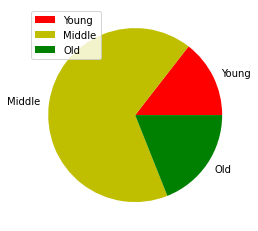

In [600]:
colors = ['r', 'y', 'g', 'b']
plt.pie(Survival_value, labels = Age, colors=colors)
plt.legend()

plt.show()

From the pie chart we can see that Middle age passengers survived the highest and it can used to predict the data.

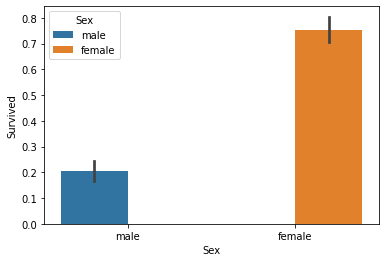

In [601]:
sns.barplot(x="Sex", y="Survived", hue="Sex", data=train_data)

Using the bar plot we figure out that of those female were the highest survived passenger.


In [602]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

men = train_data.loc[train_data.Sex =='male']["Survived"]
rate_men = sum(men)/len(men)

print("% of women who survived:\n", rate_women)
print("% of men whoe survived:\n",rate_men)

% of women who survived:
 0.7547892720306514
% of men whoe survived:
 0.2052980132450331


In [603]:
x = sum(train_data['Pclass'] == 1)
print(x)

y = sum(train_data['Pclass'] == 2)
print(y)

z = sum(train_data['Pclass'] == 3)
print(z)


186
173
355


In [604]:
pclass_1 = survive_by_age['Survived'][train_data['Pclass'] == 1]
p_1 = sum(pclass_1)

sur_plc_1 = (p_1/290)*100
print("The survival rate of first class passegers is",sur_plc_1,"%")

pclass_2 = survive_by_age['Survived'][train_data['Pclass'] == 2]
p_2 = sum(pclass_2)

sur_plc_2 = (p_2/290)*100
print("The survival rate of second class passegers is",sur_plc_2,"%")

pclass_3 = survive_by_age['Survived'][train_data['Pclass'] == 3]
p_3 = sum(pclass_3)

sur_plc_3 = (p_3/290)*100
print("The survival rate of third class passegers is",sur_plc_3,"%")

The survival rate of first class passegers is 42.06896551724138 %
The survival rate of second class passegers is 28.620689655172416 %
The survival rate of third class passegers is 29.310344827586203 %


In [605]:
pcl = ['First','second','third']
Survival_value_p = [p_1,p_2,p_3]

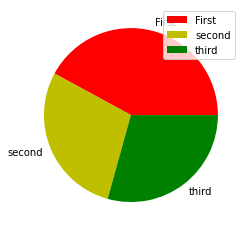

In [606]:
colors = ['r', 'y', 'g', 'b']
plt.pie(Survival_value_p, labels = pcl, colors=colors)
plt.legend()

plt.show()

From the pie we figure out that First class passengers survived the most.

Now we will move forward to read from the test data and predict using random forest classifier.

In [607]:
a = test_data.isnull().sum()
print(a)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [608]:
test_data.shape

(418, 11)

In [609]:
test_data.dropna(subset = ["Age"], inplace=True)

In [610]:
test_data.shape

(332, 11)

In [611]:
for index in test_data.index:
  
  if (test_data.loc[index,'Age'] > 0.0) and (test_data.loc[index,'Age'] <= 13.0):
    test_data.loc[index,'Age'] = 1
  elif (test_data.loc[index,'Age'] > 13.0) and (test_data.loc[index,'Age'] <= 40):
    test_data.loc[index,'Age'] = 2
  elif (test_data.loc[index,'Age'] > 40) and (test_data.loc[index,'Age'] <= 100.0):
    test_data.loc[index,'Age'] = 3

For the test data to use random forest classifier and predict for the survival in the test data we have to features for the decision tree and since we have to use age as a feature in both the data set I have preprocessed the **Age** data to have only three nodes classifying it into three categories i.e, young, middle and old.
Using the data preprocessing and using **Age** as a feature I have used random forest classifier to predict on the test data.

In [614]:
features = ["Pclass", "Sex", "Age","SibSp"]

X = pd.get_dummies(train_data[features])
y = train_data["Survived"]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)

X_test = pd.get_dummies(test_data[features])
rf_predictions = model.predict(X_test)
print("Random forest Accuracy with 4 features : ", round(model.score(X, y)*100, 2))

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': rf_predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Random forest Accuracy with 4 features :  83.75
Your submission was successfully saved!


The code uses 4 feature in the random forest classifier and predciton holds an accuracy of 83.75%.